In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
data= pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
le=LabelEncoder()
cols = [6, 9, 10]
for i in cols:
    data.iloc[:,i]=le.fit_transform(data.iloc[:,i])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [5]:
X = data.values[:,1:]

In [6]:
Y = pd.cut(data.Sales,bins=2,labels=np.arange(2),right=False)
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [7]:
kfold=KFold()
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [8]:
model = RandomForestClassifier()

In [13]:
results= cross_val_score(model, X, Y, cv=kfold)
results.mean()

0.8025

In [10]:
model.fit(X,Y)
model.feature_importances_

array([0.1156311 , 0.11271257, 0.11731297, 0.08092232, 0.21999813,
       0.14264445, 0.1222851 , 0.05835393, 0.01322724, 0.01691219])

In [11]:
colname=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
attributes=pd.Series(model.feature_importances_,index=colname)
attributes

CompPrice      0.115631
Income         0.112713
Advertising    0.117313
Population     0.080922
Price          0.219998
ShelveLoc      0.142644
Age            0.122285
Education      0.058354
Urban          0.013227
US             0.016912
dtype: float64

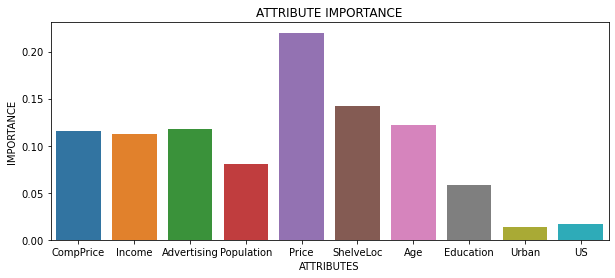

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (10, 4)
_, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=attributes.index,y=attributes, ax=ax)
plt.xlabel("ATTRIBUTES")
plt.ylabel("IMPORTANCE")
plt.title("ATTRIBUTE IMPORTANCE")
plt.show()